In [1]:
# PY libraries
import pandas as pd
import re
import nltk

# basic funcs
"""
def default_steam():
    steam.drop('Unnamed: 0', inplace=True, axis=1)
    steam = steam.sort_values("app_id")

def letters_count_update():
    steam['letters_count'] = steam['review_text'].apply(lambda x: len(x))

def comment_filter():
    steam = steam[steam['letters_count'] > 10]
    steam = steam[(steam['letters_count'] >= 25) | (steam['review_votes'] == 1)]
    steam = steam.sort_values('letters_count')

def minus_to_1():
    for i in steam.index:
        if steam.loc[i, "review_score"] == -1:
            steam.loc[i, "review_score"] = 0
"""

'\ndef default_steam():\n    steam.drop(\'Unnamed: 0\', inplace=True, axis=1)\n    steam = steam.sort_values("app_id")\n\ndef letters_count_update():\n    steam[\'letters_count\'] = steam[\'review_text\'].apply(lambda x: len(x))\n\ndef comment_filter():\n    steam = steam[steam[\'letters_count\'] > 10]\n    steam = steam[(steam[\'letters_count\'] >= 25) | (steam[\'review_votes\'] == 1)]\n    steam = steam.sort_values(\'letters_count\')\n\ndef minus_to_1():\n    for i in steam.index:\n        if steam.loc[i, "review_score"] == -1:\n            steam.loc[i, "review_score"] = 0\n'

In [ ]:
# NULLS TYPES LETTERS_COUNT COMMENT_FILTER
steam = pd.read_csv(r'SteamReviews.csv')

# int type
# print(steam.isnull().sum(axis = 0))
steam = steam.astype({'app_id':'int', 'review_score':'int', 'review_votes':'int'})

# NULL
steam.dropna(inplace = True)

# -1 to 0
for i in steam.index:
        if steam.loc[i, "review_score"] == -1:
            steam.loc[i, "review_score"] = 0

# letters counts column
steam['letters_count'] = steam['review_text'].apply(lambda x: len(x))

# comments
steam = steam[steam['letters_count'] > 10]
steam = steam[(steam['letters_count'] >= 25) | (steam['review_votes'] == 1)]
steam = steam.sort_values('letters_count')

In [ ]:
### LOAD FILE_1
# steam.to_csv('steam1.csv')
steam = pd.read_csv(r'steam1.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

In [ ]:
# LOWER REGEX COMMENT_FILTER
def cleanSymbols(text):
    res = re.sub(r"[^a-zA-Z\s]+", "", text)
    return res

def cleanLinks(text):
    res = re.sub(r"http\s+", "", text)
    res = re.sub("w+://s+", "", res)
    return res
steam['review_text'] = steam['review_text'].astype(str).str.lower()
steam['review_text'] = steam['review_text'].apply(cleanLinks)
steam['review_text'] = steam['review_text'].apply(cleanSymbols)

# UPDATE LETTERS_COUNT & DELETE COMMENTS
steam['letters_count'] = steam['review_text'].apply(lambda x: len(x))
steam = steam.sort_values('letters_count')
steam = steam[steam['letters_count'] > 10]
steam = steam[(steam['letters_count'] >= 25) | (steam['review_votes'] == 1)]
steam = steam.sort_values('letters_count')

In [ ]:
### LOAD FILE_2 4988035
# steam.to_csv('steam2.csv')
steam = pd.read_csv(r'steam2.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

In [ ]:
# TOKENS
def delete_long_and_tokenize(text):
    res = [w for w in text.split() if len(w) < 20]
    if len(res) <= 3:
        res = ''
    return res
steam["tokens"] = steam["review_text"].apply(lambda x: delete_long_and_tokenize(x))
steam = steam[steam['tokens'].str.len() > 0]

In [ ]:
### LOAD FILE_3 TOKENIZED 4787150
# steam.to_csv('steam3.csv')
steam = pd.read_csv(r'steam3.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

In [ ]:
# STOPWORDS
# nltk.download('stopwords')
SW = list(nltk.corpus.stopwords.words("english"))
for i in range(len(SW)):
    SW[i] = re.sub(r"[^a-zA-Z]+", '', SW[i])
stop_words = set(SW)

def stopwords_cleaner(text):
    text = str(text)[2:-2]
    text = text.split("', '")
    res = [w for w in text if w not in stop_words]
    if len(res) <= 4:
        return ''
    return ' '.join(res)
steam['tokens'] = steam['tokens'].apply(stopwords_cleaner)
steam = steam[steam['tokens'].str.len() > 0]

steam.head()

In [ ]:
### LOAD FILE_4 STOPWORDS 4333260
# steam.to_csv('steam4.csv')
steam = pd.read_csv(r'steam4.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

In [ ]:
### LOAD FILE_SMALL 20520
# steam = steam[steam['app_id'] <= 20520]
# steam.to_csv('small_steam.csv')
steam = pd.read_csv(r'small_steam.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

In [38]:
# LEMMAS
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()  # 1st word -> tag -> 1st letter
    tags = {"N": wordnet.NOUN,
                "J": wordnet.ADJ,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tags.get(tag, wordnet.NOUN)

lem = WordNetLemmatizer()
def lem_text(text):
    newL = []
    for w in nltk.word_tokenize(text):
        ne = lem.lemmatize(w, get_pos(w)) 
        newL.append(ne)
    return newL
steam['tokens'] = steam["tokens"].apply(lem_text)
#steam['lemmas'] = steam["tokens"].apply(lem_text)
steam.head()

,app_id,app_name,review_text,review_score,review_votes,letters_count,tokens
0,10,Counter-Strike,best shooter ever buy it or regret it,1,0,37,"[best, shooter, ever, buy, regret]"
3671,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,"[best, online, gungameno, word, describe, gud,..."
3670,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,"[best, online, gungameno, word, describe, gud,..."
3669,10,Counter-Strike,pros no microtransactions fun original game ...,1,0,141,"[pro, microtransactions, fun, original, game, ..."
3668,10,Counter-Strike,such game much love many sweat,1,1,30,"[game, much, love, many, sweat]"


In [ ]:
# TOKENS_COUNT
def list_to_text(text):
    text = str(text)[2:-2].split("', '")
    return ' '.join(text)
# steam['tokens'] = steam['tokens'].apply(list_to_text)
steam['tokens_count'] = steam['tokens'].apply(lambda x: len(str(x).split()))
steam.head()

In [88]:
### LOAD FILE_SMALL_LEMMED
# steam.to_csv('small_steam_lemmed.csv')
steam = pd.read_csv(r'small_steam_lemmed.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

,app_id,app_name,review_text,review_score,review_votes,letters_count,tokens,tokens_count
0,10,Counter-Strike,best shooter ever buy it or regret it,1,0,37,best shooter ever buy regret,5
3671,10,Counter-Strike,i think every huge counter strike fan should o...,1,0,144,think every huge counter strike fan game begin...,15
3670,10,Counter-Strike,i like this game playing since i was played a...,1,0,101,like game play since played lot fine graphic s...,12
3669,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,best online gungameno word describe gud wil si...,12
3668,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,best online gungameno word describe gud wil si...,12


In [89]:
# NEW COLUMN - TEXT_SIZE
import numpy as np
tbins  = np.linspace(min(steam['tokens_count']), max(steam['tokens_count']), 4)
steam['text_size'] = pd.cut(steam['tokens_count'], tbins, labels=['Little', 'Medium', 'Big'], include_lowest=True)

In [94]:
# POLARITY
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
steam['polarity'] = steam['review_text'].apply(lambda x: analyser.polarity_scores(x))
steam['compound']  = steam['polarity'].apply(lambda pol: pol['compound'])

,app_id,app_name,review_text,review_score,review_votes,letters_count,tokens,tokens_count,text_size,polarity,compound
0,10,Counter-Strike,best shooter ever buy it or regret it,1,0,37,best shooter ever buy regret,5,Little,"{'neg': 0.215, 'neu': 0.462, 'pos': 0.323, 'co...",0.3400
3671,10,Counter-Strike,i think every huge counter strike fan should o...,1,0,144,think every huge counter strike fan game begin...,15,Little,"{'neg': 0.049, 'neu': 0.724, 'pos': 0.227, 'co...",0.6597
3670,10,Counter-Strike,i like this game playing since i was played a...,1,0,101,like game play since played lot fine graphic s...,12,Little,"{'neg': 0.093, 'neu': 0.549, 'pos': 0.359, 'co...",0.6486
3669,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,best online gungameno word describe gud wil si...,12,Little,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.7650
3668,10,Counter-Strike,best online gungameno words to describe how gu...,1,0,101,best online gungameno word describe gud wil si...,12,Little,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.7650


In [107]:
# COMPOUND UPDATE
def update_compound(com, score, votes):
    if score == 1:
        com += 0.1
        if votes == 1:
            com += 0.4
    else:
        com -= 0.1
        if votes == 1:
            com -= 0.4

    com = -1 if com < -1 else com
    com = 1 if com > 1 else com
    com =  0.2 if (score == 1 and com < 0) else com
    com = -0.2 if (score == 0 and com > 0) else com
    return com
#sub['compound'] = sub.apply(lambda row: update_compound(row['compound'], row['review_score'], row['review_votes']), axis=1)
#sub['sentiment'] = pd.cut(sub['compound'], [-1,-0.3, 0.3, 1], labels=['Neg', 'Neu', 'Pos'], include_lowest=True)
steam['compound'] = steam.apply(lambda row: update_compound(row['compound'], row['review_score'], row['review_votes']), axis=1)
steam['sentiment'] = pd.cut(steam['compound'], [-1,-0.3, 0.3, 1], labels=['Neg', 'Neu', 'Pos'], include_lowest=True)
sub.head()

,app_id,app_name,review_text,review_score,review_votes,letters_count,tokens,tokens_count,text_size,polarity,compound,sentiment
328028,8500,EVE Online,when i first logged in to eve online i was exc...,1,1,2281,first log eve online excite join player driven...,214,Little,"{'neg': 0.055, 'neu': 0.794, 'pos': 0.151, 'co...",1.0000,Pos
155906,620,Portal 2,this game is way too hard i thought this woul...,0,1,82,game way hard thought would fps game boring pu...,9,Little,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'comp...",-0.9019,Neg
313874,8170,Battlestations: Pacific,i played this game on my xbox when i was young...,0,0,168,played game xbox young get want deal microsoft...,15,Little,"{'neg': 0.112, 'neu': 0.696, 'pos': 0.191, 'co...",-0.2000,Neu
255143,4000,Garry's Mod,now this is the real sandbox you can make pret...,1,0,71,real sandbox make pretty much anything want,7,Little,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.6423,Pos
130154,570,Dota 2,life of a support but i still love the game,1,0,45,life support still love game,5,Little,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou...",0.9248,Pos


In [3]:
### LOAD FILE_SENTIMENT
# steam.to_csv('sentimented.csv')
steam = pd.read_csv(r'sentimented.csv')
steam.drop('Unnamed: 0', inplace=True, axis=1)
steam = steam.sort_values("app_id")
steam.head()

,app_id,app_name,review_text,review_score,review_votes,letters_count,tokens,tokens_count,text_size,polarity,compound,sentiment
0,10,Counter-Strike,best shooter ever buy it or regret it,1,0,37,best shooter ever buy regret,5,Little,"{'neg': 0.215, 'neu': 0.462, 'pos': 0.323, 'co...",0.4400,Pos
3671,10,Counter-Strike,best game ever the joy it gives when playing w...,1,0,74,best game ever joy give play friend unbelievable,8,Little,"{'neg': 0.0, 'neu': 0.352, 'pos': 0.648, 'comp...",1.0000,Pos
3670,10,Counter-Strike,was still is and always will be the best onlin...,1,0,61,still always best online fps game ever,7,Little,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.7369,Pos
3669,10,Counter-Strike,i think every huge counter strike fan should o...,1,0,144,think every huge counter strike fan game begin...,15,Little,"{'neg': 0.049, 'neu': 0.724, 'pos': 0.227, 'co...",0.7597,Pos
3668,10,Counter-Strike,i like this game playing since i was played a...,1,0,101,like game play since played lot fine graphic s...,12,Little,"{'neg': 0.093, 'neu': 0.549, 'pos': 0.359, 'co...",0.7486,Pos


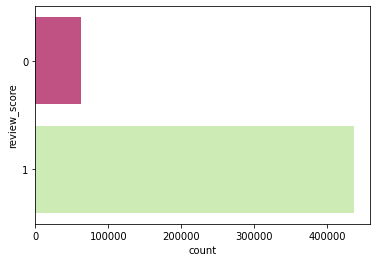

In [24]:
import seaborn as sns
sns.countplot(y='review_score', data=steam, palette=['#D14081',"#CCF5AC"]);

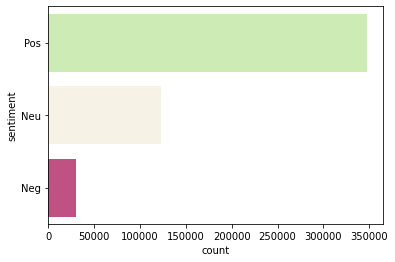

In [111]:
sns.countplot(y='sentiment', data=steam, palette=['#CCF5AC', '#F9F5E3', "#D14081"]);

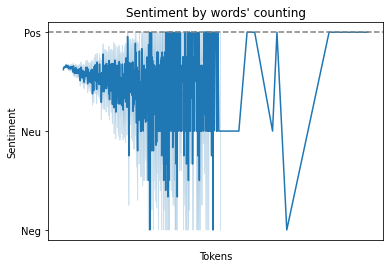

In [112]:
g = sns.lineplot(x='tokens_count', y='sentiment', data=steam)
g.set(xticklabels=[]) 
g.set(title="Sentiment by words' counting")
g.set(xlabel="Tokens")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)
g.axhline(0, ls='--', c = 'grey');

In [21]:
# ALL WORDS FREQUENCY_DIST
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

all_tokens = ' '.join([token for token in steam['tokens']])
all_tokens = nltk.word_tokenize(all_tokens)

fd = FreqDist(all_tokens)
top1000 = fd.most_common(1000)

In [33]:
# POS FREQUENCY_DIST
is_noun = lambda pos: pos[:2] == 'NN'
top_nouns = FreqDist()
top_adjs = FreqDist()
top_verbs = FreqDist()

for w in top1000:
    pos = nltk.pos_tag(nltk.word_tokenize(w[0]))
    tag = pos[0][1]
    if tag == 'NN':
        top_nouns[w[0]] = w[1]
    if tag == 'JJ':
        top_adjs[w[0]] = w[1]
    if tag == 'VB':
        top_verbs[w[0]] = w[1]

<AxesSubplot:>

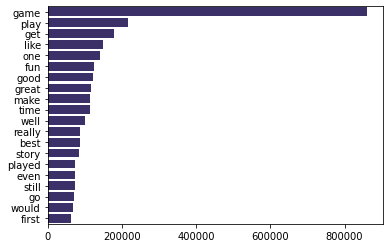

In [34]:
# TOP 20 WORDS
top = fd.most_common(20)
topS = pd.Series(dict(top))
sns.barplot(y=topS.index, x=topS.values, color='#372772')

<AxesSubplot:>

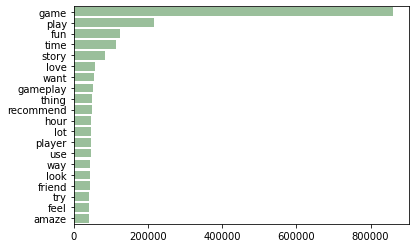

In [35]:
# TOP 20 NOUNS
top_20n = top_nouns.most_common(20)
topS = pd.Series(dict(top_20n))
sns.barplot(y=topS.index, x=topS.values, color='#94C595')

<AxesSubplot:>

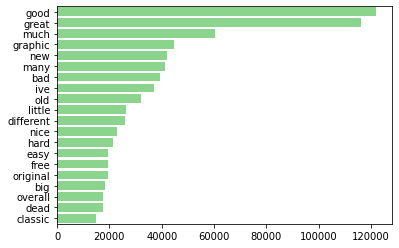

In [36]:
# TOP 20 ADJS
top_20a = top_adjs.most_common(20)
topS = pd.Series(dict(top_20a))
sns.barplot(y=topS.index, x=topS.values, color='#7EE081')

<AxesSubplot:>

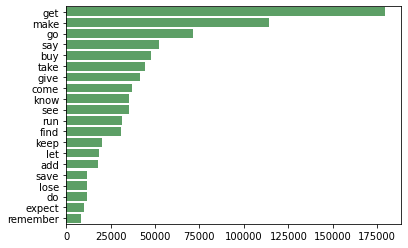

In [37]:
# TOP 20 VERBS
top_20v = top_verbs.most_common(20)
topS = pd.Series(dict(top_20v))
sns.barplot(y=topS.index, x=topS.values, color='#52AA5E')

In [38]:
# TOP GAMES
games = steam[['app_name']]
games = games.groupby('app_name').value_counts().to_frame()
games.rename(columns={games.columns[0]: 'count'}, inplace=True)
games = games.sort_values('count', ascending=False)

games = games.head(10)
games.head(10)

,count
app_name,
Dota 2,40687
Left 4 Dead 2,36679
Portal 2,29272
BioShock Infinite,25579
Garry's Mod,20094


In [ ]:
plotd = 

In [ ]:
# MEAN SCORE FOR DIFF GAMES
# MOST POPULAR GAMES BY WORDS
sns.boxplot(x='app_name', y='tokens_count', data=steam)
# CHECK GAMES FOR POSITIVE OR NEGATIVE

In [ ]:
# 3D PLOT value_of_positive TO COMMENT_QUANTITY OF GAME
# y = steam['value_of_positive']
# x = steam['app_id'].count()
# plt.scatter(x,y)
# plt.title('..')
# plt.xlabel("Comments' quantity")
# plt.ylabel("")
